Loading mnist dataset.
get_tensors found 48 tensors


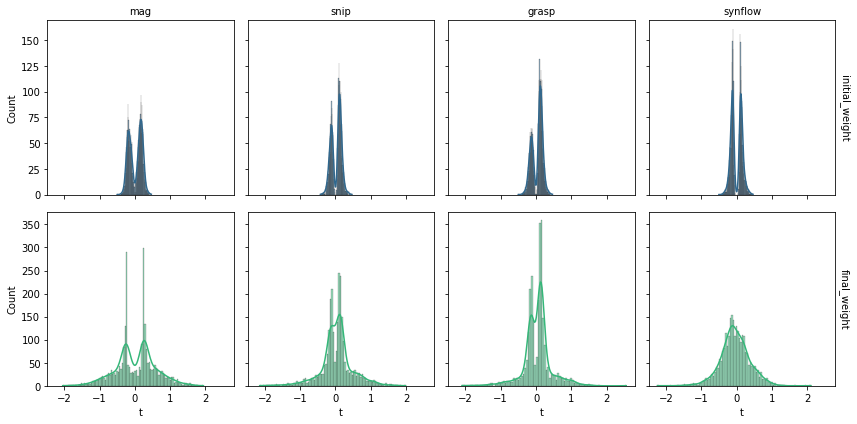

In [1]:
import os
os.chdir("/workspaces/BAIT")

from figures.fig_utils import savefig
import pandas as pd
import seaborn as sns
# 5f1dd52e-dac5-11ec-b7f4-0242ac120004
# 5f357f8a-dac5-11ec-831d-0242ac120002

from analysis.results_utils import get_tensors, print_histograms, load_csv

df = load_csv()
df = df.sort_values(by="final_sparsity")


def baseline_query():
    mapping = {
        "rand": "o1",
        "mag": "i1",
        "snip": "o1",
        "grasp": "o1",
        "synflow": "o10",
    }
    return " or ".join([f'phase_0_strategy == "{algo}" and type_short == "{type}"' for algo, type in mapping.items()])


df_bl = df.query(baseline_query())


files = df_bl["file"].to_list()
# pin specific attributes or leave all options in
experiment = {
    "files": files,
    "init_id": ["5f1dd52e-dac5-11ec-b7f4-0242ac120004", "5f357f8a-dac5-11ec-831d-0242ac120002"],
    "sparsity": 0.005,
    # "experiment_type": "o10",
    "algo": ["snip", "synflow", "grasp", "mag"],
    # # "layer_name": "fc.weight",
    # "init_strategy": "standard",
    "kind": ["initial_weight", "final_weight"],
}
df_tensors = pd.DataFrame(get_tensors(**experiment, masked=True))

# df_tensors = pd.DataFrame(get_tensors(**experiment, masked=True))
g = print_histograms(df_tensors, sharex=True, sharey="row", label="kind", palette="viridis", bins=100)

savefig(g, "6_baseline_histograms")

# Meta Learn Scores

get_tensors found 36 tensors


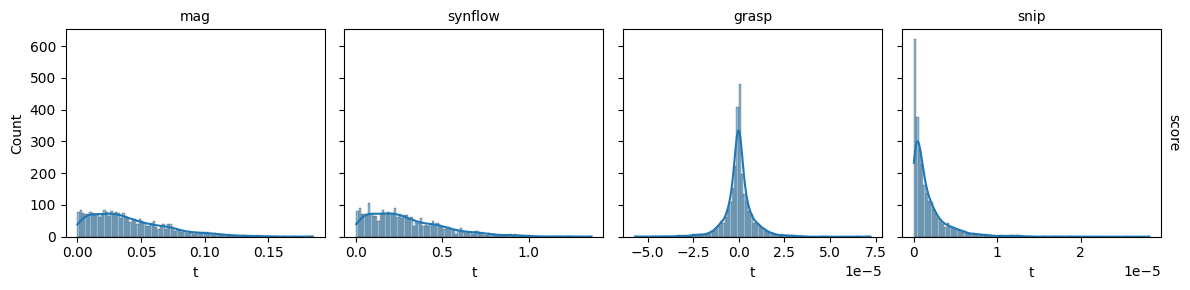

In [7]:
from analysis.results_utils import print_histograms

experiment = {
    # "init_id": "d063470e-da8f-11ec-8a7e-0242ac120003",
    "sparsity": 0.2,
    "experiment_type": "o1",
    "algo": ["snip", "grasp", "synflow", "mag"],
    "layer_name": "fc_layers.0.weight",
    "kind": "score",
    "init_strategy": "standard"
}
# import pandas as pd
df_tensors = pd.DataFrame(get_tensors(**experiment, masked=False))
g = print_histograms(df_tensors, col="algo", sharex=False)
savefig(g, "5_metalearn_scores_hist")